Estimating the cost of Insurance incurred by using RandomForestRegressor

In [1]:
#Importing necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the Dtataframe
df=pd.read_csv(r'C:\Users\Admin\Desktop\Kerfegar\Analytics&ML\Projects\Insurance Forecasting using RandomForest\insurance.csv')
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='region', ylabel='count'>

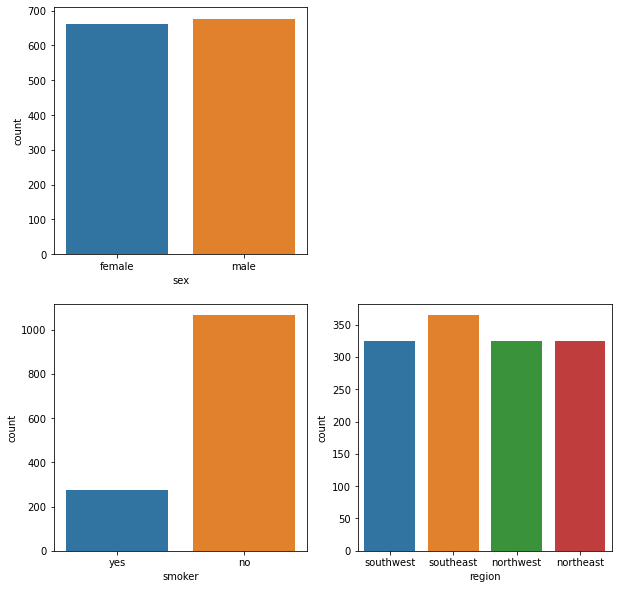

In [3]:
#estimating the distribution of catogorical features in the dataframe
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.countplot(df["sex"])
plt.subplot(2,2,3)
sns.countplot(df["smoker"])
plt.subplot(2,2,4)
sns.countplot(df["region"])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Average BMI of the top 90 percentile of insurance payers = 35.66119402985075
Average no. of children of the top 90 percentile of insurance payers = 1


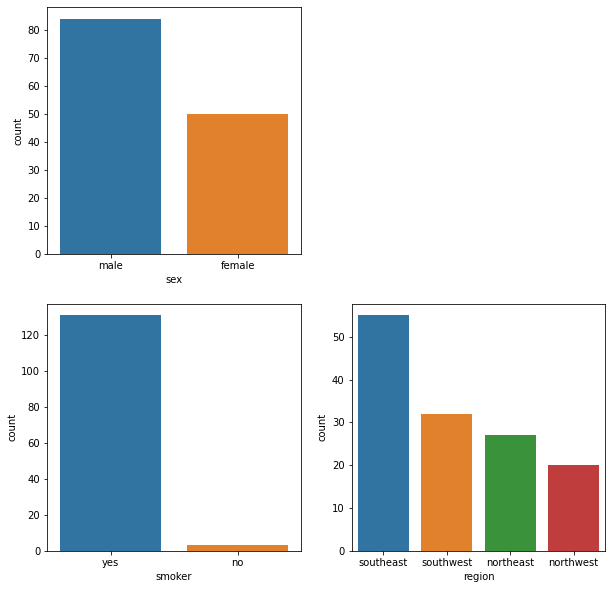

In [4]:
#estimating the distribution of catogorical features in top 10% of the insurance payers 
df_uq=df[df['expenses']>=df["expenses"].quantile(0.9)]
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.countplot(df_uq["sex"])
plt.subplot(2,2,3)
sns.countplot(df_uq["smoker"])
plt.subplot(2,2,4)
sns.countplot(df_uq["region"])
#estimating the mean of numerical features in top 10% of the insurance payers 
print("Average BMI of the top 90 percentile of insurance payers =",df_uq["bmi"].mean())
print("Average no. of children of the top 90 percentile of insurance payers =",round(df_uq["children"].mean()))

In [5]:
#Spliting the dataframe into target and feature variables
x=df.drop('expenses',axis=1)
y=df['expenses']

In [6]:
#Encoding the string values into numeric
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
catf=['sex','smoker','region']
oh=OneHotEncoder()
transformer=ColumnTransformer([("Encoder",oh,catf)],remainder='passthrough')
x=transformer.fit_transform(x)

In [7]:
#Generating Co-Relation Matrix
df.corr()

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


<AxesSubplot:>

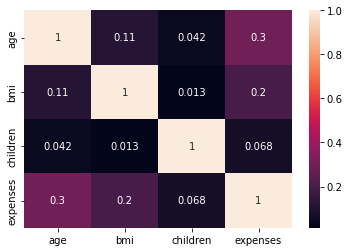

In [8]:
#plotting Heatmap
sns.heatmap(df.corr(),annot=True)

In [9]:
#Splitting the data into train and test
np.random.seed(42)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [10]:
#Finding the optimum value of alpha
from sklearn.ensemble import RandomForestRegressor
sc=[]
for i in range (1,30):
    model=RandomForestRegressor(max_depth=i)
    model.fit(x_train,y_train)
    sc.append(model.score(x_test,y_test))

Text(0, 0.5, 'score')

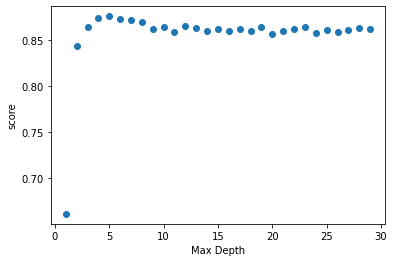

In [11]:
#plotting for optimum value of alpha
plt.scatter(range(1,30),sc)
plt.xlabel("Max Depth")
plt.ylabel("score")

In [24]:
#Training the model at optimum value of alpha
model=RandomForestRegressor(max_depth=5)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8745957359497044

In [25]:
#Generating Predictions from the model
y_preds=model.predict(x_test)

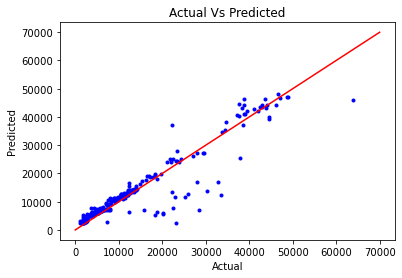

In [26]:
#Comparing the Actual vs Predicted values
comp=pd.DataFrame({"Actual":y_test,"Predicted":y_preds})
plt.scatter(x=comp["Actual"],y=comp["Predicted"],color="blue",marker=".")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual Vs Predicted")
plt.plot(range(0,80000,10000),range(0,80000,10000),color='red')
plt.show()

In [27]:
#Calculating mean absolute Error
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,y_preds)
mae

2525.7683075144746